# LTA DataMall API User Guide

Reference document url: https://datamall.lta.gov.sg/content/dam/datamall/datasets/LTA_DataMall_API_User_Guide.pdf

In [1]:
import os,sys
PROJECT_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, PROJECT_PATH)

In [2]:
# Import api key from api_key.py's LTA_API_KEY
from conf.api_key import LTA_API_KEY, GOOGLE_MAP_API_KEY
from typing import Union, Dict
import requests
import pandas as pd
from PIL import Image
from PIL import UnidentifiedImageError
import requests
# Importing the geodesic module from the library 
from geopy.distance import geodesic

In [3]:
def api_query(api_link: str,  agent_id: str, api_key: str, params_dict: Dict = None) -> Union[Dict,None]:
    """Function which executes query via an api link using a provided agent_id as an identifier to avoid rejection of query request

    Args:
        api_link (str): API Link which requests is to be made
        agent_id (str): Id used for request header
        api_key (str): API Key provided
        params_dict (Dict): Dictionary containing parameters to be passed in requests' get method

    Returns:
        Dictionary containing request content. None when exception are encountered.
    """
    req_headers = {"User-agent": agent_id, "AccountKey": api_key, "Content-Type": "application/json"}
    try:
        res = requests.get(url=api_link,
                           params=params_dict,
                           headers=req_headers,
                           timeout=5)
        # Raise if HTTPError occured
        res.raise_for_status()

        # Check the status code before extending the number of posts
        if res.status_code == 200:
            print(f"Request successful with status code {res.status_code}")
            the_json = res.json()
            return the_json
        else:
            print(f"Return unssucessful with status code {res.status_code}")
            return res.status_code

    except requests.exceptions.HTTPError as errh:
        print(errh)
    except requests.exceptions.ConnectionError as errc:
        print(errc)
    except requests.exceptions.Timeout as errt:
        print(errt)
    except requests.exceptions.RequestException as err:
        print(err)
    return None

## List of 27 API URLs provided by LTA Datamall as of 04 Apr 2023 v5.5 Document
|API|URL|Update Frequency|Parameters|Response type|
|---|---|---|---|---|
|Bus Arrival|http://datamall2.mytransport.sg/ltaodataservice/BusArrivalv2|1min|*BusStopCode*;*ServiceNo*|Various Attributes|
|Bus Services|http://datamall2.mytransport.sg/ltaodataservice/BusServices|Ad hoc||Various Attributes|
|Bus Routes|http://datamall2.mytransport.sg/ltaodataservice/BusRoutes|Ad Hoc||Various Attributes|
|Bus Stops|http://datamall2.mytransport.sg/ltaodataservice/BusStops|Ad Hoc||Various Attributes|
|Passenger Volume by Bus Stops|http://datamall2.mytransport.sg/ltaodataservice/PV/Bus|Every 15th of mth update prev mth data|*Date*=YYYYMM|Link expiring in 5mins (last 3mths)|
|Passenger Volume By Origin Destination Bus Stops|http://datamall2.mytransport.sg/ltaodataservice/PV/ODBus|Every 15th of mth update prev mth data|*Date*=YYYYMM|Link expiring in 5mins (last 3mths)|
|Passenger Volume By Origin Destination Train Stations|http://datamall2.mytransport.sg/ltaodataservice/PV/ODTrain|Every 15th of mth update prev mth data|*Date*=YYYYMM|Link expiring in 5mins (last 3mths)|
|Passenger Volume By Train Stations|http://datamall2.mytransport.sg/ltaodataservice/PV/Train|Every 15th of mth update prev mth data|*Date*=YYYYMM|Link expiring in 5mins (last 3mths)|
|Taxi Availability|http://datamall2.mytransport.sg/ltaodataservice/Taxi-Availability|1 min||Latitude/Longitude Attribute|
|Taxi Stands|http://datamall2.mytransport.sg/ltaodataservice/TaxiStands|Monthly||Various Attributes|
|Train Service Alerts|http://datamall2.mytransport.sg/ltaodataservice/TrainServiceAlerts|Ad hoc||Various Attributes|
|Carpark Availability(HDB/LTA/URA)|http://datamall2.mytransport.sg/ltaodataservice/CarParkAvailabilityv2|1min||Various Attribute|
|ERP Rates|http://datamall2.mytransport.sg/ltaodataservice/ERPRates|Ad hoc||Various Attribute|
|Estimated Travel Times|http://datamall2.mytransport.sg/ltaodataservice/EstTravelTimes|5mins||Various Attribute|
|Faulty Traffic Lights|http://datamall2.mytransport.sg/ltaodataservice/FaultyTrafficLights|2mins - whenever there are updates||Various Attributes|
|Road Openings|http://datamall2.mytransport.sg/ltaodataservice/RoadOpenings|24 hours -whenever there are updates||Various Attributes|
|Road Works|http://datamall2.mytransport.sg/ltaodataservice/RoadWorks|24 hours -whenever there are updates||Various Attributes|
|Traffic Images|http://datamall2.mytransport.sg/ltaodataservice/Traffic-Imagesv2|1 to 5 mins||Link expiring in 5mins|
|Traffic Incidents|http://datamall2.mytransport.sg/ltaodataservice/TrafficIncidents|2 mins - whenever there are updates||Various Attributes|
|Traffic Speed Bands|http://datamall2.mytransport.sg/ltaodataservice/v3/TrafficSpeedBands|5 mins||Various Attributes|
|VMS/EMAS|http://datamall2.mytransport.sg/ltaodataservice/VMS|2 mins||Various Attributes|
|Bicycle Parking|http://datamall2.mytransport.sg/ltaodataservice/BicycleParkingv2|Monthly|*Lat*;*Long*;*Dist*=(Radius in km)|Various Attributes|
|Geospatial|http://datamall2.mytransport.sg/ltaodataservice/GeospatialWholeIsland|Ad hoc|*ID*=Name of Geospatial Layer|Link expiring in 5 mins|
|Facilities Maintenance|http://datamall2.mytransport.sg/ltaodataservice/FacilitiesMaintenace|Ad hoc|*StationCode* (eg. NS1)|Link expiring in 5 mins|
|Platform Crowd Density Real Time|http://datamall2.mytransport.sg/ltaodataservice/PCDForecast|24 hours|*TrainLine* (eg. EWL)|Various Attributes|
|Platform Crowd Density Forecast|http://datamall2.mytransport.sg/ltaodataservice/PCDRealTime|10 mins|*TrainLine* (eg. EWL)|Various Attributes|
|Traffic Flow|http://datamall2.mytransport.sg/ltaodataservice/TrafficFlow|Quarterly||Link expiring in 5mins|

Taxi Stands location

- Similar to traffic images API, can filter and extract nearby taxistands

In [4]:
taxi_stand_url = "http://datamall2.mytransport.sg/ltaodataservice/TaxiStands"

taxi_stand_api_response = api_query(api_link=taxi_stand_url, agent_id="test", api_key=LTA_API_KEY, params_dict={"TrainLine": "CCL"})

taxi_stand_api_response
response_content = taxi_stand_api_response.get("value")
print(response_content)

Request successful with status code 200
[{'TaxiCode': 'A01', 'Latitude': 1.304294727, 'Longitude': 103.8338467, 'Bfa': 'Yes', 'Ownership': 'LTA', 'Type': 'Stand', 'Name': 'Orchard Rd along driveway of Lucky Plaza'}, {'TaxiCode': 'A05', 'Latitude': 1.304571786, 'Longitude': 103.835547, 'Bfa': 'Yes', 'Ownership': 'Private', 'Type': 'Stand', 'Name': 'Mt Elizabeth Rd at Mt Elizabeth Hospital'}, {'TaxiCode': 'A06', 'Latitude': 1.303519805, 'Longitude': 103.8376729, 'Bfa': 'Yes', 'Ownership': 'LTA', 'Type': 'Stop', 'Name': 'Cairnhill Rd at Cairnhill Nine'}, {'TaxiCode': 'A08', 'Latitude': 1.303709915, 'Longitude': 103.8327402, 'Bfa': 'Yes', 'Ownership': 'Private', 'Type': 'Stand', 'Name': 'Orchard Turn at Wisma Atria Shopping Centre'}, {'TaxiCode': 'A12', 'Latitude': 1.302879021, 'Longitude': 103.8405818, 'Bfa': 'Yes', 'Ownership': 'Private', 'Type': 'Stop', 'Name': 'Cuppage Rd at Starhub Centre'}, {'TaxiCode': 'A13', 'Latitude': 1.300918488, 'Longitude': 103.8422631, 'Bfa': 'No', 'Ownership

Bus stop location

In [5]:
bus_stpop_url = "http://datamall2.mytransport.sg/ltaodataservice/TaxiStands"

taxi_stand_api_response = api_query(api_link=taxi_stand_url, agent_id="test", api_key=LTA_API_KEY, params_dict={"TrainLine": "CCL"})

taxi_stand_api_response
response_content = taxi_stand_api_response.get("value")
print(response_content)

Request successful with status code 200
[{'TaxiCode': 'A01', 'Latitude': 1.304294727, 'Longitude': 103.8338467, 'Bfa': 'Yes', 'Ownership': 'LTA', 'Type': 'Stand', 'Name': 'Orchard Rd along driveway of Lucky Plaza'}, {'TaxiCode': 'A05', 'Latitude': 1.304571786, 'Longitude': 103.835547, 'Bfa': 'Yes', 'Ownership': 'Private', 'Type': 'Stand', 'Name': 'Mt Elizabeth Rd at Mt Elizabeth Hospital'}, {'TaxiCode': 'A06', 'Latitude': 1.303519805, 'Longitude': 103.8376729, 'Bfa': 'Yes', 'Ownership': 'LTA', 'Type': 'Stop', 'Name': 'Cairnhill Rd at Cairnhill Nine'}, {'TaxiCode': 'A08', 'Latitude': 1.303709915, 'Longitude': 103.8327402, 'Bfa': 'Yes', 'Ownership': 'Private', 'Type': 'Stand', 'Name': 'Orchard Turn at Wisma Atria Shopping Centre'}, {'TaxiCode': 'A12', 'Latitude': 1.302879021, 'Longitude': 103.8405818, 'Bfa': 'Yes', 'Ownership': 'Private', 'Type': 'Stop', 'Name': 'Cuppage Rd at Starhub Centre'}, {'TaxiCode': 'A13', 'Latitude': 1.300918488, 'Longitude': 103.8422631, 'Bfa': 'No', 'Ownership

TrainStation PassengerVolume exploration

- Using Circle Line (CCL) as reference.

In [6]:
train_network_line_list = ["CCL",
                           "CEL",
                           "CGL",
                           "DTL",
                           "EWL",
                           "NEL",
                           "DTL",
                           "NEL",
                           "NSL",
                           "BPL",
                           "SLRT",
                           "PLRT"]

train_station_url = "http://datamall2.mytransport.sg/ltaodataservice/PV/Train"
train_station_api_response = api_query(api_link=train_station_url, agent_id="test", api_key=LTA_API_KEY, params_dict={"TrainLine": "CCL"})

response_content = train_station_api_response.get("value")[0].get("Link").strip()
print(response_content)

Request successful with status code 200
https://ltafarecard.s3.ap-southeast-1.amazonaws.com/202312/transport_node_train_202312.zip?X-Amz-Security-Token=IQoJb3JpZ2luX2VjECcaDmFwLXNvdXRoZWFzdC0xIkgwRgIhAKxOmlvCMiZJH1QN0HDk9h8ViAlWfXhibpYi5j7gmX9AAiEAn5XVXc2BHZGVHpLs34V0IeUdGjJIWDjw9x%2FevGLabSYqywUI0P%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FARAEGgwzNDA2NDUzODEzMDQiDHibLKtzDg%2FeJNVxqSqfBR67txnvAekgb0GPnLSBqiLpQnJY%2BVG7HzJSKXOQz5CvfhKb%2BXquq6L0etUGP1v5wDZngCTHc3FVyUuzFXKFFTMU9JaPQTK32mq1JYM5H4RzeJnWuJL0RPsXp9gZMP0XjGgOXz%2FaSjMgETaoSROLrxC3H0FQaPCOD%2FQxnPif4r2%2BisWZRrAz3cP2NuStJKiDP%2BX7aKA%2BsQzb6xVrI43sYgjtHewz41pq3SDYWW8chYQzbcseEmgv8CONi27iInfgSxHzC%2BzM2X3XWfNrEo%2FeWs%2Feq8QzGfUjmwm6ZdGJbABhSGP6i6EW4NjIeOKYJSr8M2o61kC0xp1zDkxulxHltdus9HHKTXjf6GMoCgp0UVSp0kZvobhOxHhqiivHMnZI39U7nompDlJLg8wEeHKLi8OWTPxJyDTHxLbNXBhbTlDAT16XqGrxGLuqq9quXaH9jnISByBSOj%2Fo0Z80oxE4dB%2FlvlEyTd1q6Zfri3LP0AGgA%2F4kfVCRsxpZmxF%2B8ItFDNsI5CFyMXTnu9K8l8oc6HDeJdzP13Td5dvBNOiNl7k0QoJmvuHyGrjw5nG6Q2mo2X%2BMj1lytMOKxbRZj%

In [7]:
# Reading of the csv file compressed in provided link
df = pd.read_csv(response_content,  compression='zip', header=0, sep=',', )

In [8]:
df

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2023-12,WEEKDAY,11,TRAIN,NS7,20301,15305
1,2023-12,WEEKENDS/HOLIDAY,11,TRAIN,NS7,12854,13130
2,2023-12,WEEKENDS/HOLIDAY,16,TRAIN,SW4,1150,1188
3,2023-12,WEEKDAY,16,TRAIN,SW4,1706,2077
4,2023-12,WEEKDAY,10,TRAIN,CC5,2506,4630
...,...,...,...,...,...,...,...
6811,2023-12,WEEKENDS/HOLIDAY,6,TRAIN,DT23,459,485
6812,2023-12,WEEKDAY,7,TRAIN,NS27/CE2/TE20,918,6227
6813,2023-12,WEEKENDS/HOLIDAY,7,TRAIN,NS27/CE2/TE20,446,1100
6814,2023-12,WEEKDAY,12,TRAIN,SE5,2734,1822


## Traffic Images API exploration and extraction of such traffic image nearby a point of interest within a specified radius.

In [9]:
# TrafficImages
traffic_images_url = "http://datamall2.mytransport.sg/ltaodataservice/Traffic-Imagesv2"
traffic_images_api_response = api_query(api_link=traffic_images_url, agent_id="test", api_key=LTA_API_KEY)
traffic_image_data_list = traffic_images_api_response.get("value")
traffic_image_data_list

Request successful with status code 200


[{'CameraID': '1001',
  'Latitude': 1.29531332,
  'Longitude': 103.871146,
  'ImageLink': 'https://dm-traffic-camera-itsc.s3.ap-southeast-1.amazonaws.com/2024-01-18/16-10/1001_1608_20240118161004_525748.jpg?X-Amz-Security-Token=IQoJb3JpZ2luX2VjECgaDmFwLXNvdXRoZWFzdC0xIkYwRAIgDg8nrgHBiQu7CeLvT%2BlgTlV8Aj2fn%2BarEbvLIE8xhl8CIAOcHpxxNpcRhTxDZwnT5QMcAKEHeBghpQRY6d4vDo%2FpKsoFCNH%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEQBBoMMzQwNjQ1MzgxMzA0Igz7ST8NWzeS%2B%2B4fJt8qngWWLXkD5Qgzx08OtMCojyxZcuoZy%2BnQnqsBm0tG4DJboOu4wEURWMqvprFfNmwNlfQ7Jm66xcvuCR6pnmG%2FYknA4aIgKIT5NmMpooIkUjlFNG3XJXDjEtK3XjCd8P6MrvwDShp%2ByuDh3y2sHPsOAE48VIqI5Ajk%2B1%2ByJ0bFWsVGwl1zH9oxmrM076KoVpIAvkFWENudY2xzoZ5HXct5FYmE4%2BTY%2FTfZVUCKkg34NxKaO%2BBpXnr0qofrtLsXAj6RQ0QnsgIL3DSlJ6SHgRadDl3EEHZc%2BpSeuDyftpKWTFCrm0CZg0eNQ2xOCeBQ%2FpmUmsH4Z2RA6y9DPy2eQZMl579ofPuDOJfnHazV8gKjQP8KNvxmpkBVgD1v%2Bu7kk8rINIZDarL4JwRL%2B8%2FIKLsjLLZa9bQdn%2B0oYzGUw1tTJ2kz9pARpDNDfz%2BxTgB8BG7e8O7Pzd22GVbtpesqevJwyziZfeeVAQxC5OO9r2ToldHwZeO9zf0yCP2DxF9c6KwzfID8

Filter for nearby cctv footage cameras based on a radius around a point of interest. Sort and get the nearest cctv footage for display

In [10]:
def geodesic_distance_filter(centre_point: tuple, radius_in_km: float, data_list: list, latitude_key_name: str, longitude_key_name: str):

    return [data for data in data_list if geodesic(centre_point, tuple([data[latitude_key_name], data[longitude_key_name]])).kilometers < radius_in_km]

In [11]:
# Filter for coordinates which are within a specified radius of test point

radius = 0.5 #in km
test_point = tuple([1.2953,103.87])

# Apply filtering 
surrounding_traffic_images_list = geodesic_distance_filter(centre_point=test_point, radius_in_km=radius, data_list=traffic_image_data_list, latitude_key_name="Latitude", longitude_key_name="Longitude")

In [12]:
# Update list with distance
for traffic_image in surrounding_traffic_images_list:
    traffic_image["Distance"] = geodesic(test_point, tuple([traffic_image["Latitude"],traffic_image["Longitude"]])).kilometers

In [13]:
surrounding_traffic_images_list.sort(key=lambda x: x["Distance"], reverse=False)
surrounding_traffic_images_list

[{'CameraID': '1001',
  'Latitude': 1.29531332,
  'Longitude': 103.871146,
  'ImageLink': 'https://dm-traffic-camera-itsc.s3.ap-southeast-1.amazonaws.com/2024-01-18/16-10/1001_1608_20240118161004_525748.jpg?X-Amz-Security-Token=IQoJb3JpZ2luX2VjECgaDmFwLXNvdXRoZWFzdC0xIkYwRAIgDg8nrgHBiQu7CeLvT%2BlgTlV8Aj2fn%2BarEbvLIE8xhl8CIAOcHpxxNpcRhTxDZwnT5QMcAKEHeBghpQRY6d4vDo%2FpKsoFCNH%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEQBBoMMzQwNjQ1MzgxMzA0Igz7ST8NWzeS%2B%2B4fJt8qngWWLXkD5Qgzx08OtMCojyxZcuoZy%2BnQnqsBm0tG4DJboOu4wEURWMqvprFfNmwNlfQ7Jm66xcvuCR6pnmG%2FYknA4aIgKIT5NmMpooIkUjlFNG3XJXDjEtK3XjCd8P6MrvwDShp%2ByuDh3y2sHPsOAE48VIqI5Ajk%2B1%2ByJ0bFWsVGwl1zH9oxmrM076KoVpIAvkFWENudY2xzoZ5HXct5FYmE4%2BTY%2FTfZVUCKkg34NxKaO%2BBpXnr0qofrtLsXAj6RQ0QnsgIL3DSlJ6SHgRadDl3EEHZc%2BpSeuDyftpKWTFCrm0CZg0eNQ2xOCeBQ%2FpmUmsH4Z2RA6y9DPy2eQZMl579ofPuDOJfnHazV8gKjQP8KNvxmpkBVgD1v%2Bu7kk8rINIZDarL4JwRL%2B8%2FIKLsjLLZa9bQdn%2B0oYzGUw1tTJ2kz9pARpDNDfz%2BxTgB8BG7e8O7Pzd22GVbtpesqevJwyziZfeeVAQxC5OO9r2ToldHwZeO9zf0yCP2DxF9c6KwzfID8

<Response [200]>


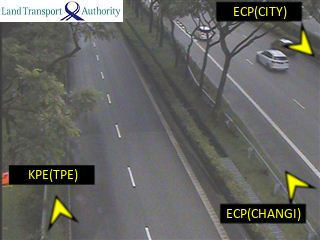

In [14]:
img_link_to_retrieve = surrounding_traffic_images_list[0]["ImageLink"]
img_link_to_retrieve
from IPython.display import display # For notebook purposes.
response = requests.get(img_link_to_retrieve, stream=True)
print(response)
try:
    img = Image.open(response.raw)
    display(img)
except UnidentifiedImageError:
    print("Unable to identify link as image file, hence image cannot be displayed ")


## BUS STOPS

Returns detailed information for all bus stops currently being serviced by
buses, including: Bus Stop Code, location coordinates.

In [15]:
busstop_url = "http://datamall2.mytransport.sg/ltaodataservice/BusStops"
busstop_api_response = api_query(api_link=busstop_url, agent_id="test", api_key=LTA_API_KEY)

busstop_list = busstop_api_response.get("value")

test_point = tuple([1.29685,103.853])
surrounding_busstop_list = geodesic_distance_filter(centre_point=test_point, radius_in_km=radius, data_list=busstop_list, latitude_key_name="Latitude", longitude_key_name="Longitude")

len(surrounding_busstop_list)

Request successful with status code 200


In [24]:
surrounding_busstop_list

[{'BusStopCode': '01012',
  'RoadName': 'Victoria St',
  'Description': 'Hotel Grand Pacific',
  'Latitude': 1.29684825487647,
  'Longitude': 103.85253591654006},
 {'BusStopCode': '01013',
  'RoadName': 'Victoria St',
  'Description': "St. Joseph's Ch",
  'Latitude': 1.29770970610083,
  'Longitude': 103.8532247463225},
 {'BusStopCode': '01019',
  'RoadName': 'Victoria St',
  'Description': 'Bras Basah Cplx',
  'Latitude': 1.29698951191332,
  'Longitude': 103.85302201172507},
 {'BusStopCode': '01029',
  'RoadName': 'Nth Bridge Rd',
  'Description': 'Opp Natl Lib',
  'Latitude': 1.2966729849642,
  'Longitude': 103.85441422464267},
 {'BusStopCode': '01039',
  'RoadName': 'Nth Bridge Rd',
  'Description': 'Bugis Cube',
  'Latitude': 1.29820784139683,
  'Longitude': 103.85549139837407},
 {'BusStopCode': '01112',
  'RoadName': 'Victoria St',
  'Description': 'Opp Bugis Stn Exit C',
  'Latitude': 1.30009212839081,
  'Longitude': 103.85520027125814},
 {'BusStopCode': '01119',
  'RoadName': 'Vi

## Taxi Stand

Returns detailed information of Taxi stands, such as location and whether is it
barrier free.

In [27]:
taxi_stand_url = "http://datamall2.mytransport.sg/ltaodataservice/TaxiStands"
taxi_stand_api_response = api_query(api_link=taxi_stand_url, agent_id="test", api_key=LTA_API_KEY)

taxi_stand_list = taxi_stand_api_response.get("value")

surrounding_taxi_stand_list = geodesic_distance_filter(centre_point=test_point, radius_in_km=radius, data_list=taxi_stand_list, latitude_key_name="Latitude", longitude_key_name="Longitude")
print(len(surrounding_taxi_stand_list))
surrounding_taxi_stand_list

Request successful with status code 200
13


[{'TaxiCode': 'B06',
  'Latitude': 1.297702738,
  'Longitude': 103.8490929,
  'Bfa': 'Yes',
  'Ownership': 'Private',
  'Type': 'Stop',
  'Name': 'Bencoolen St at SMU School of Econ & Social Sciences'},
 {'TaxiCode': 'B07',
  'Latitude': 1.297537879,
  'Longitude': 103.8493444,
  'Bfa': 'Yes',
  'Ownership': 'Private',
  'Type': 'Stop',
  'Name': 'Bencoolen St at SMU School of Information Systems'},
 {'TaxiCode': 'B08',
  'Latitude': 1.296189886,
  'Longitude': 103.8504108,
  'Bfa': 'Yes',
  'Ownership': 'Private',
  'Type': 'Stand',
  'Name': 'Queen St at SMU Li Ka Shing Library'},
 {'TaxiCode': 'B09',
  'Latitude': 1.298087188,
  'Longitude': 103.8521884,
  'Bfa': 'Yes',
  'Ownership': 'LTA',
  'Type': 'Stand',
  'Name': 'Queen St at China Cultural Centre'},
 {'TaxiCode': 'B10',
  'Latitude': 1.299986059,
  'Longitude': 103.8526465,
  'Bfa': 'Yes',
  'Ownership': 'CCS',
  'Type': 'Stand',
  'Name': 'Waterloo St at Stamford Arts Centre'},
 {'TaxiCode': 'B11',
  'Latitude': 1.298453493

## Bicycle parking

Returns bicycle parking locations within a radius. The default radius is
set as 0.5km


In [17]:
bicycle_parking_url = "http://datamall2.mytransport.sg/ltaodataservice/BicycleParkingv2"


# Pass in required lat/long/dist parameters
bicycle_parking_api_response = api_query(api_link=bicycle_parking_url, agent_id="test", api_key=LTA_API_KEY,  params_dict={"Lat":test_point[0], "Long": test_point[1], "Dist": radius})

bicycle_parking_list = bicycle_parking_api_response.get("value")

surrounding_bicycle_parking_list = geodesic_distance_filter(centre_point=test_point, radius_in_km=radius, data_list=bicycle_parking_list, latitude_key_name="Latitude", longitude_key_name="Longitude")

surrounding_bicycle_parking_list

Request successful with status code 200


[{'Description': '180264-1',
  'Latitude': 1.298938681288013,
  'Longitude': 103.85245488026638,
  'RackType': 'HDB_RACKS',
  'RackCount': 5,
  'ShelterIndicator': 'Y'},
 {'Description': 'BENCOOLEN MRT B2',
  'Latitude': 1.298088110640396,
  'Longitude': 103.84980471937551,
  'RackType': 'MRT_RACKS',
  'RackCount': 5,
  'ShelterIndicator': 'N'},
 {'Description': 'BUGIS MRT D',
  'Latitude': 1.2990728036094445,
  'Longitude': 103.85685026263248,
  'RackType': 'MRT_RACKS',
  'RackCount': 80,
  'ShelterIndicator': 'N'},
 {'Description': 'BENCOOLEN MRT B1',
  'Latitude': 1.2982167673366427,
  'Longitude': 103.84990836562484,
  'RackType': 'MRT_RACKS',
  'RackCount': 5,
  'ShelterIndicator': 'N'},
 {'Description': 'BENCOOLEN MRT A',
  'Latitude': 1.299321649678109,
  'Longitude': 103.85084377311324,
  'RackType': 'MRT_RACKS',
  'RackCount': 40,
  'ShelterIndicator': 'N'},
 {'Description': 'NATIONAL LIBRARY (NORTH BRIDGE ROAD)',
  'Latitude': 1.2972735491255531,
  'Longitude': 103.8545948277

## TrafficSpeedBands
Returns current traffic speeds on expressways and arterial roads,
expressed in speed bands.


In [ ]:
# TrafficFlow
traffic_speed_band_url = "http://datamall2.mytransport.sg/ltaodataservice/v3/TrafficSpeedBands"
traffic_speed_api_response = api_query(api_link=traffic_speed_band_url, agent_id="test", api_key=LTA_API_KEY)

traffic_speed_band_list = traffic_speed_api_response.get("value")
len(traffic_speed_band_list)

Request successful with status code 200


500

In [ ]:
traffic_speed_band_list

[{'LinkID': '103000000',
  'RoadName': 'KENT ROAD',
  'RoadCategory': 'E',
  'SpeedBand': 4,
  'MinimumSpeed': '30',
  'MaximumSpeed': '39',
  'StartLon': '103.85298052044503',
  'StartLat': '1.3170142376560023',
  'EndLon': '103.85259882242372',
  'EndLat': '1.3166840028663076'},
 {'LinkID': '103000010',
  'RoadName': 'BUCKLEY ROAD',
  'RoadCategory': 'E',
  'SpeedBand': 8,
  'MinimumSpeed': '70',
  'MaximumSpeed': '999',
  'StartLon': '103.84102305136321',
  'StartLat': '1.3166507852203482',
  'EndLon': '103.84022564204443',
  'EndLat': '1.316912438354752'},
 {'LinkID': '103000011',
  'RoadName': 'BUCKLEY ROAD',
  'RoadCategory': 'E',
  'SpeedBand': 8,
  'MinimumSpeed': '70',
  'MaximumSpeed': '999',
  'StartLon': '103.84022564204443',
  'StartLat': '1.316912438354752',
  'EndLon': '103.84102305136321',
  'EndLat': '1.3166507852203482'},
 {'LinkID': '103000014',
  'RoadName': 'SHREWSBURY ROAD',
  'RoadCategory': 'E',
  'SpeedBand': 4,
  'MinimumSpeed': '30',
  'MaximumSpeed': '39',
 